In [3]:
import numpy as np
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing import sequence
from keras import layers
from keras.layers import Embedding
import os
import time
from keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
stop = set (stopwords.words("english"))
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from keras.preprocessing.text import Tokenizer

def remove_stopwords (text):
    filtered_words= [word.lower() for word in text.split() \
                     if word.lower() not in stop]
    return " ".join(filtered_words)

In [5]:
#FOR_LEARNING
t = Tokenizer()

test_text = ['Deep Learning',
             'Machine Learning',
             'Data Mining ! $ % *']

t.fit_on_texts(test_text)

sequences = t.texts_to_sequences(test_text)

print("The sequences generated from text are : ",sequences)
print("Number of unique words used in all data", len(t.word_counts))
print('word_index ', t.word_index)

The sequences generated from text are :  [[1, 4, 1], [5, 2, 3], [6, 2], [3, 7, 1, 1, 8]]
Number of unique words used in all data 8
word_index  {'arash': 1, 'learning': 2, 'artificial': 3, 'rahmati': 4, 'machine': 5, 'deep': 6, 'intelligence': 7, 'arashh': 8}


# READ TRAIN

In [127]:
path_train_positive = \
r"D:\ALL ABOUT UNIVERSITY\KNTUmaster's\Term2\DL\LMDB\aclImdb\train\pos"
path_train_negative = \
r"D:\ALL ABOUT UNIVERSITY\KNTUmaster's\Term2\DL\LMDB\aclImdb\train\neg"


x_train_positive=[]
x_train_negative=[]

start = time.time()

os.chdir(path_train_positive)
for file in os.listdir():
    if file.endswith(".txt"):
        file = open(f"{path_train_positive}\{file}", 'r', encoding='utf8')
        x_train_positive.append(remove_stopwords(file.read()))

os.chdir(path_train_negative)
for file in os.listdir():
    if file.endswith(".txt"):
        file = open(f"{path_train_negative}\{file}", 'r', encoding='utf8')
        x_train_negative.append(remove_stopwords(file.read()))
        
end = time.time()   
print('It took', round((end-start),2),    \
      'secs to read positive and negative train')

It took 113.45 secs to read positive and negative train


In [129]:
x_train = x_train_positive + x_train_negative
y_train = [1]*12500 + [0]*12500

# READ TEST

In [128]:
path_test_positive = \
r"D:\ALL ABOUT UNIVERSITY\KNTUmaster's\Term2\DL\LMDB\aclImdb\test\pos"
path_test_negative = \
r"D:\ALL ABOUT UNIVERSITY\KNTUmaster's\Term2\DL\LMDB\aclImdb\test\neg"


x_test_positive=[]
x_test_negative=[]

start = time.time()

os.chdir(path_test_positive)
for file in os.listdir():
    if file.endswith(".txt"):
        file = open(f"{path_test_positive}\{file}", 'r', encoding='utf8')
        x_test_positive.append(remove_stopwords(file.read()))

os.chdir(path_test_negative)
for file in os.listdir():
    if file.endswith(".txt"):
        file = open(f"{path_test_negative}\{file}", 'r', encoding='utf8')
        x_test_negative.append(remove_stopwords(file.read()))
        
end = time.time()   
print('It took', round((end-start),2),      \
      'secs to read positive and negative test')

It took 5.8 secs to read positive and negative test


In [131]:
x_test = x_test_positive + x_test_negative
y_test = [1]*12500 + [0]*12500

# review => bag of words => id's of word

In [10]:
x_full = x_train + x_test

t1 = Tokenizer()
t1.fit_on_texts(x_full)
num_of_unique_words= len(t1.word_counts)
print("Number of unique words in All Data: ", num_of_unique_words) 
#124,252 unique words =stopwords=> 123,277

Number of unique words in All Data:  123277


In [86]:
#t1.word_counts #88,071 words in train_set

In [132]:
tokenizer = Tokenizer (num_of_unique_words)
tokenizer.fit_on_texts(x_train)                    

In [134]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [140]:
for i in range (0,len(x_train_sequences)):    #change to numpy format
    x_train_sequences[i] = np.array( x_train_sequences[i])
    
for i in range (0,len(x_test_sequences)):
    x_test_sequences[i] = np.array( x_test_sequences[i])

In [141]:
max, sum, min, ind=0, 0, 2000, -1

for j in range (0, len(x_train)):
    
    sum = sum + len(x_train_sequences[j])
    if len(x_train_sequences[j])>max: 
        max=len(x_train_sequences[j])
    if len(x_train_sequences[j])<min: 
        min=len(x_train_sequences[j])
        ind=j

print("max length of a message: ", max)
print("min length of a message: ", min)
print("avg length of a message: ", sum/25000)

max length of a message:  1495
min length of a message:  4
avg length of a message:  132.69968


In [16]:
ind

13568

In [17]:
x_train[13568]

'movie terrible good effects.'

In [152]:
max_length= 140
x_train_padded = pad_sequences(x_train_sequences, \
                maxlen=max_length, padding="post", truncating="post")
x_test_padded = pad_sequences(x_test_sequences, \
                maxlen=max_length, padding="post", truncating="post")
x_train_padded.shape, x_test_padded.shape

((25000, 140), (25000, 140))

# LSTM MODEL

In [163]:
model = keras.models.Sequential()
model.add(layers.Embedding(num_of_unique_words, 32, \
                           input_length=max_length))
model.add(layers.LSTM(80, dropout=0.15, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid"))
          
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 140, 32)           3944864   
                                                                 
 lstm_5 (LSTM)               (None, 80)                36160     
                                                                 
 dense_5 (Dense)             (None, 1)                 81        
                                                                 
Total params: 3,981,105
Trainable params: 3,981,105
Non-trainable params: 0
_________________________________________________________________


In [164]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
#optim = keras.optimizers.Adam(learning_rate=0.001)
optim = keras.optimizers.Adamax(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [165]:
kee = model.fit(x_train_padded, np.array(y_train), \
                epochs=5, batch_size=150, \
                validation_data=\
                (x_test_padded, np.array(y_test)),verbose=2 )

Epoch 1/5
167/167 - 39s - loss: 0.6862 - accuracy: 0.5254 - val_loss: 0.6038 - val_accuracy: 0.7342 - 39s/epoch - 235ms/step
Epoch 2/5
167/167 - 36s - loss: 0.4514 - accuracy: 0.8046 - val_loss: 0.3977 - val_accuracy: 0.8323 - 36s/epoch - 218ms/step
Epoch 3/5
167/167 - 37s - loss: 0.3151 - accuracy: 0.8750 - val_loss: 0.3438 - val_accuracy: 0.8512 - 37s/epoch - 219ms/step
Epoch 4/5
167/167 - 36s - loss: 0.2639 - accuracy: 0.9005 - val_loss: 0.3876 - val_accuracy: 0.8505 - 36s/epoch - 218ms/step
Epoch 5/5
167/167 - 37s - loss: 0.2173 - accuracy: 0.9195 - val_loss: 0.3250 - val_accuracy: 0.8615 - 37s/epoch - 219ms/step


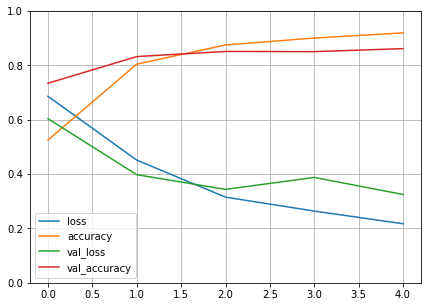

In [166]:
pd.DataFrame ( kee.history ).plot(figsize=(7,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig(r"C:\Users\Arash_desktop\Desktop\result.png",dpi=300)

# TEST ON MY COMMENTS

In [189]:
tt = ["To be honest, I didn't like this movie. The director didn't do well neither did the actors.\
It was boring and long. They could have conveyed the message in much less time"]
tt = [remove_stopwords(tt[0])]
tkn=tokenizer.texts_to_sequences(tt)
tkn_np = np.array (tkn)
arash_padded = pad_sequences(tkn_np, maxlen=max_length, \
                             padding="post", truncating="post")

In [1]:
model.predict(arash_padded)

NameError: name 'model' is not defined